In [192]:
import os
from PIL import Image

import pandas as pd
from itertools import product, combinations
import numpy as np
from itertools import permutations
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    auc,
    roc_curve
)
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

## Načítanie datasetu

In [3]:
df = pd.read_csv('pattern_pairs.csv', index_col=0)
df

,pattern_name1,pattern_name2,resulting_embedding1,resulting_embedding2,starting_embedding1,starting_embedding2,starting_embedding1_weighted,starting_embedding2_weighted,resulting_embedding1_weighted,resulting_embedding2_weighted,...,cos_similarity_result_result_weighted,cos_similarity_result_start_2_weighted,euc_distance_result_start_1_weighted,euc_distance_start_start_weighted,euc_distance_result_result_weighted,euc_distance_result_start_2_weighted,hem_distance_result_start_1,hem_distance_start_start,hem_distance_result_result,hem_distance_result_start_2
0,Build Prototypes,Community Of Trust,[ 2.61067878e-02 4.42429408e-02 6.45606220e-...,[ 1.38922473e-02 6.77836984e-02 -1.19587388e-...,[ 5.03203906e-02 1.90185625e-02 5.35412552e-...,[ 3.39925662e-02 2.18393188e-03 -6.43960666e-...,[ 1.50961176e-01 5.70556894e-02 1.60623770e-...,[ 1.01977699e-01 6.55179564e-03 -1.93188190e-...,[ 7.83203617e-02 1.32728815e-01 1.93681866e-...,[ 4.16767411e-02 2.03351095e-01 -3.58762145e-...,...,0.633504,0.663182,0.295255,0.312311,0.295351,0.308063,319,275,335,297
1,Build Prototypes,Completion Headroom,[ 2.61067878e-02 4.42429408e-02 6.45606220e-...,[-2.88144201e-02 1.05386145e-01 -5.85874729e-...,[ 5.03203906e-02 1.90185625e-02 5.35412552e-...,[-6.43286183e-02 4.63349745e-02 -1.58505626e-...,[ 1.50961176e-01 5.70556894e-02 1.60623770e-...,[-1.92985862e-01 1.39004916e-01 -4.75516878e-...,[ 7.83203617e-02 1.32728815e-01 1.93681866e-...,[-8.64432603e-02 3.16158444e-01 -1.75762419e-...,...,0.620173,0.637398,0.283406,0.297404,0.289834,0.298322,350,320,320,310
2,Build Prototypes,Day Care,[ 2.61067878e-02 4.42429408e-02 6.45606220e-...,[ 7.10740462e-02 -3.41413496e-03 -3.89550291e-...,[ 5.03203906e-02 1.90185625e-02 5.35412552e-...,[ 6.99718446e-02 5.65670654e-02 -1.67445149e-...,[ 1.50961176e-01 5.70556894e-02 1.60623770e-...,[ 2.09915534e-01 1.69701189e-01 -5.02335432e-...,[ 7.83203617e-02 1.32728815e-01 1.93681866e-...,[ 2.13222146e-01 -1.02424044e-02 -1.16865084e-...,...,0.684717,0.621988,0.289326,0.293272,0.306964,0.291549,356,332,320,318
3,Build Prototypes,Developer Controls Process,[ 2.61067878e-02 4.42429408e-02 6.45606220e-...,[ 4.16691601e-02 -5.68606332e-02 -2.69975513e-...,[ 5.03203906e-02 1.90185625e-02 5.35412552e-...,[ 4.95785698e-02 5.66840097e-02 -4.61871624e-...,[ 1.50961176e-01 5.70556894e-02 1.60623770e-...,[ 1.48735702e-01 1.70052022e-01 -1.38561487e-...,[ 7.83203617e-02 1.32728815e-01 1.93681866e-...,[ 1.25007480e-01 -1.70581907e-01 -8.09926540e-...,...,0.631332,0.682716,0.305274,0.345871,0.290161,0.309445,325,267,323,303
4,Build Prototypes,Development Episode,[ 2.61067878e-02 4.42429408e-02 6.45606220e-...,[ 4.84957732e-02 1.28112556e-02 -1.87822040e-...,[ 5.03203906e-02 1.90185625e-02 5.35412552e-...,[ 3.58099374e-03 1.26703037e-03 -1.90097839e-...,[ 1.50961176e-01 5.70556894e-02 1.60623770e-...,[ 1.07429810e-02 3.80109111e-03 -5.70293516e-...,[ 7.83203617e-02 1.32728815e-01 1.93681866e-...,[ 1.45487323e-01 3.84337679e-02 -5.63466102e-...,...,0.685617,0.678533,0.269797,0.284647,0.313659,0.315293,377,339,303,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,Standards Linking Locations,Subclass Per Team,[ 6.17811037e-03 4.49776836e-02 3.65375984e-...,[ 4.54427637e-02 6.21435791e-02 -1.56160370e-...,[ 4.80972417e-02 -8.49126809e-05 -2.53729932e-...,[ 3.25220004e-02 2.71286722e-02 1.77920945e-...,[ 1.44291729e-01 -2.54738028e-04 -7.61189759e-...,[ 9.75660011e-02 8.13860148e-02 5.33762835e-...,[ 1.85343307e-02 1.34933054e-01 1.09612793e-...,[ 1.36328295e-01 1.86430737e-01 -4.68481109e-...,...,0.705896,0.712318,0.302245,0.313882,0.324391,0.326197,318,300,271,275
4182,Standards Linking Locations,Variation Behind Interface,[ 6.17811037e-03 4.49776836e-02 3.65375984e-...,[-3.01435194e-03 2.73764059e-02 -3.75971571e-...,[ 4.80972417e-02 -8.49126809e-05 -2.53729932e-...,[ 1.10850688e-02 4.58643846e-02 -3.68527584e-...,[ 1.44291729e-01 -2.54738028e-04 -7.61189759e-...,[ 3.32552046e-02 1.375931

### Dataset s dvojicami vzorov, ktoré sú vo vzťahu

In [4]:
df_orgStyle = pd.read_csv('orgStyleRelations.csv', index_col=0)
df_orgStyle = df_orgStyle[df_orgStyle.realtion==1]
df_orgStyle

,pattern1,pattern2,realtion
1,Few Roles,Divide And Conquer,1
3,Divide And Conquer,De-Couple Stages,1
5,Divide And Conquer,Conway's Law,1
6,Divide And Conquer,Organization Follows Location,1
8,Divide And Conquer,Organization Follows Market,1
10,Conway's Law,Standards Linking Locations,1
12,Conway's Law,Loose Interfaces,1
14,Conway's Law,Deploy Along The Grain,1
17,Conway's Law,Subsystem By Skill,1
18,Conway's Law,Organization Follows Location,1


In [5]:
df_peopleAndCode = pd.read_csv('peopleAndCodeRelations.csv', index_col=0)
df_peopleAndCode = df_peopleAndCode[df_peopleAndCode.realtion==1]
df_peopleAndCode

,pattern1,pattern2,realtion
0,Architect Controls Product,Architecture Team,1
2,Architect Controls Product,Deploy Along The Grain,1
4,Architect Controls Product,Stand-Up Meeting,1
7,Architect Controls Product,Architect Also Implements,1
8,Architecture Team,LockEmUpTogether,1
11,Deploy Along The Grain,Code Ownership,1
12,Deploy Along The Grain,Feature Assignment,1
15,Deploy Along The Grain,Architect Also Implements,1
17,LockEmUpTogether,Unity Of Purpose,1
18,LockEmUpTogether,Smoke-Filled Room,1


In [6]:
df_piecemealCode = pd.read_csv('piecemealRelations.csv', index_col=0)
df_piecemealCode = df_piecemealCode[df_piecemealCode.realtion==1]
df_piecemealCode

,pattern1,pattern2,realtion
1,Size The Organization,Phasing It In,1
2,Size The Organization,Solo Virtuoso,1
5,Size The Organization,Self-Selecting Team,1
6,Size The Organization,Few Roles,1
9,Phasing It In,Apprenticeship,1
11,Phasing It In,Day Care,1
13,Solo Virtuoso,Developing In Pairs,1
15,Solo Virtuoso,EngageCustomers,1
16,Self-Selecting Team,Unity Of Purpose,1
19,Self-Selecting Team,Diverse Groups,1


In [7]:
df_projectManagment = pd.read_csv('projectManagmentRelations.csv', index_col=0)
df_projectManagment = df_projectManagment[df_projectManagment.realtion==1]
df_projectManagment

,pattern1,pattern2,realtion
0,Build Prototypes,Surrogate Customer,1
3,Get On With It,Build Prototypes,1
5,Size The Schedule,Get On With It,1
6,Size The Schedule,Phasing It In,1
8,Size The Schedule,Compensate Success,1
11,Size The Schedule,Named Stable Bases,1
12,Size The Schedule,Work Queue,1
14,Size The Schedule,Someone Always Makes Progress,1
17,Size The Schedule,Recommitment Meeting,1
18,Named Stable Bases,Take No Small Slips,1


In [8]:
df_allRelations = pd.concat([df_orgStyle, df_peopleAndCode, df_piecemealCode, df_projectManagment], ignore_index=True)
df_allRelations

,pattern1,pattern2,realtion
0,Few Roles,Divide And Conquer,1
1,Divide And Conquer,De-Couple Stages,1
2,Divide And Conquer,Conway's Law,1
3,Divide And Conquer,Organization Follows Location,1
4,Divide And Conquer,Organization Follows Market,1
...,...,...,...
154,Sacrifice One Person,Day Care,1
155,Sacrifice One Person,Mercenary Analyst,1
156,Sacrifice One Person,Fire Walls,1
157,Interrupts Unjam Blocking,Don't Interrupt An Interrupt,1


## Pomocné Funkcie

In [187]:
def getCosSimilarity(pattern1, pattern2):
    row = findPairs(pattern1, pattern2)
    if row.pattern_name1.values[0] == pattern1:
        return row.cos_similarity_result_start_1.values[0]
    else:
        return row.cos_similarity_result_start_2.values[0]
    
def getCosSimilarityStart(pattern1, pattern2):
    row = findPairs(pattern1, pattern2)
    return row.cos_similarity_start_start.values[0]
    
def getCosSimilarityResult(pattern1, pattern2):
    row = findPairs(pattern1, pattern2)
    return row.cos_similarity_result_result.values[0]
    
def getCosSimilarityWeighted(pattern1, pattern2):
    row = findPairs(pattern1, pattern2)
    if row.pattern_name1.values[0] == pattern1:
        return row.cos_similarity_result_start_1_weighted.values[0]
    else:
        return row.cos_similarity_result_start_2_weighted.values[0]
    
    
def getHemDistance(pattern1, pattern2):
    row = findPairs(pattern1, pattern2)
    if row.pattern_name1.values[0] == pattern1:
        return row.hem_distance_result_start_1.values[0]
    else:
        return row.hem_distance_result_start_2.values[0]

def getEucDistance(pattern1, pattern2):
    row = findPairs(pattern1, pattern2)
    if row.pattern_name1.values[0] == pattern1:
        return row.euc_distance_result_start_1.values[0]
    else:
        return row.euc_distance_result_start_2.values[0]
    
def findPairs(pattern1, pattern2):
    row = df.loc[((df['pattern_name1'] == pattern1) & (df['pattern_name2'] == pattern2)) | ((df['pattern_name1'] == pattern2) & (df['pattern_name2'] == pattern1))]
    return row

def makeAssumption(similarity, threshold):
    if similarity < threshold:
        return 0
    return 1

def sequenceSimilarity(listed_vars):
    all_cos_similarities = []
    all_euc_distances = []
    all_combs = []
    lenghts = []
    for c in listed_vars:
        if len(c) == 1:
            continue
        else:
            lenghts.append(len(c))
            all_combs.append(c)
            similarity = 0
            distance = 0
            for i in range(1,len(c)):
                similarity = (similarity+getCosSimilarity(c[i-1],c[i]))
                distance = (distance+getEucDistance(c[i-1],c[i]))
            similarity = similarity/len(c)
            distance = distance/len(c)
            all_cos_similarities.append(similarity)
            all_euc_distances.append(distance)
    return all_combs, all_cos_similarities, lenghts, all_euc_distances

def sequenceSimilarityWithInterSimilarity(listed_vars):
    all_cos_similarities = []
    all_combs = []
    all_euc_distances = []
    lenghts = []
    for c in listed_vars:
        if len(c) == 1:
            continue
        else:
            lenghts.append(len(c))
            all_combs.append(c)
            similarity = 0
            distance = 0
            inter_similarity = 0
            inter_distance = 0 
            for i in range(1,len(c)):
                if i < len(c)-1 or i==1:

                    for j in range(1,i):
                        inter_similarity = (inter_similarity+getCosSimilarity(c[j-1],c[len(c)-1]))
                        inter_distance = (inter_distance+getEucDistance(c[j-1],c[len(c)-1]))
                    similarity = (similarity+getCosSimilarity(c[i-1],c[i]))
                    distance = (distance+getEucDistance(c[i-1],c[i]))
                else:
                    inter_similarity = inter_similarity/i-1          
                    similarity = (similarity+(getCosSimilarity(c[i-1],c[i])*(1+inter_similarity)))
                    
                    inter_distance = inter_distance/i-1          
                    distance = (distance+(getEucDistance(c[i-1],c[i])*(1+inter_distance)))


            similarity = similarity/len(c)
            distance = distance/len(c)
            all_cos_similarities.append(similarity)
            all_euc_distances.append(distance)
            
    return all_combs, all_cos_similarities, lenghts, all_euc_distances

def createSequences(patterns):
    listed_variations = []
    for i in range(len(patterns)):
        for j in range(i,len(patterns)):
            variations = permutations(patterns[i:j+1])
            for v in variations:    
                listed_variations.append(list(v))

    return listed_variations

def evaluateModel(y_test, y_pred):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    area_under_curve = auc(fpr, tpr)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    specificity = 1-fpr[1]
    """
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC AUC: {roc_auc}')
    """
    
    return (accuracy, precision, recall, f1, roc_auc, specificity)

Tabuľka s dvojicami vzorov, ktoré sú vo vzťahu a ich podobnosti/vzdialenosti

In [52]:
df_allRelations['cos_similarity1'] = df_allRelations.apply(lambda row: getCosSimilarity(row['pattern1'], row['pattern2']),axis=1)
df_allRelations['cos_similarity2'] = df_allRelations.apply(lambda row: getCosSimilarity(row['pattern2'], row['pattern1']),axis=1)
#df_allRelations['hem_distance'] = df_allRelations.apply(lambda row: getHemDistance(row['pattern1'], row['pattern2']),axis=1)
#df_allRelations['cos_similarity_weighted'] = df_allRelations.apply(lambda row: getCosSimilarityWeighted(row['pattern1'], row['pattern2']),axis=1)
df_allRelations['cos_similarity_start'] = df_allRelations.apply(lambda row: getCosSimilarityStart(row['pattern2'], row['pattern1']),axis=1)
df_allRelations['cos_similarity_result'] = df_allRelations.apply(lambda row: getCosSimilarityResult(row['pattern2'], row['pattern1']),axis=1)

df_allRelations

,pattern1,pattern2,realtion,cos_similarity1,cos_similarity2,cos_similarity_start,cos_similarity_result
0,Few Roles,Divide And Conquer,1,0.831688,0.730982,0.732699,0.865979
1,Divide And Conquer,De-Couple Stages,1,0.725886,0.551831,0.740053,0.652770
2,Divide And Conquer,Conway's Law,1,0.776200,0.763913,0.821398,0.769426
3,Divide And Conquer,Organization Follows Location,1,0.711931,0.740767,0.721043,0.759003
4,Divide And Conquer,Organization Follows Market,1,0.702329,0.765541,0.663616,0.761844
...,...,...,...,...,...,...,...
154,Sacrifice One Person,Day Care,1,0.629544,0.605599,0.652740,0.675137
155,Sacrifice One Person,Mercenary Analyst,1,0.519140,0.529309,0.623875,0.587115
156,Sacrifice One Person,Fire Walls,1,0.664813,0.643917,0.701223,0.699155
157,Interrupts Unjam Blocking,Don't Interrupt An Interrupt,1,0.726103,0.661390,0.704648,0.741281


(array([ 1.,  3.,  7., 18., 37., 31., 32., 17., 11.,  2.]),
 array([0.51913965, 0.55494925, 0.59075885, 0.62656845, 0.66237805,
        0.69818765, 0.73399725, 0.76980685, 0.80561645, 0.84142605,
        0.87723565]),
 <BarContainer object of 10 artists>)

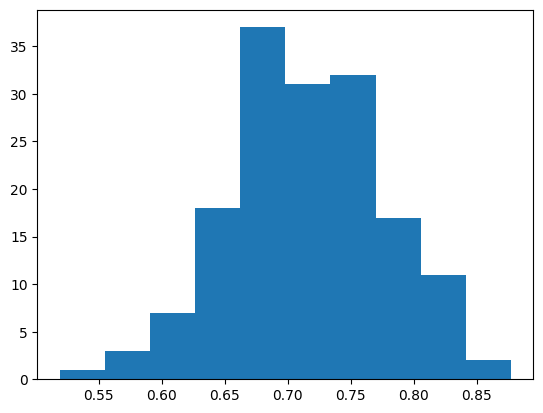

In [177]:
plt.hist(df_allRelations['cos_similarity1'])

(array([   7.,  117.,  392.,  825., 1089.,  990.,  531.,  189.,   36.,
          10.]),
 array([0.44959497, 0.49235904, 0.53512311, 0.57788717, 0.62065124,
        0.66341531, 0.70617938, 0.74894345, 0.79170751, 0.83447158,
        0.87723565]),
 <BarContainer object of 10 artists>)

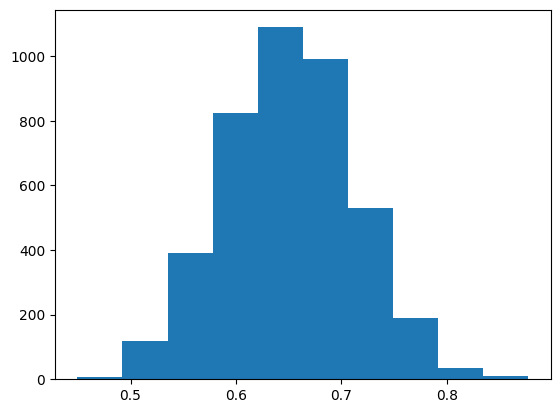

In [179]:
plt.hist(df['cos_similarity_result_start_1'])

In [10]:
accuracy = []
precision = []
recall = []
f1 = []
roc_auc = []
specificity=[]
for threshold in range(round(min(df_allRelations['cos_similarity'])*10000)-1,round(max(df_allRelations['cos_similarity'])*10000)+1):
    threshold = threshold/10000
    df_assumption = df_allRelations.copy()
    df_assumption['y_pred'] =  df_allRelations.apply(lambda row: makeAssumption(row['cos_similarity'],threshold),axis=1)

    (accuracy_value, precision_value, recall_value, f1_value, roc_auc_value,specificity_value) = evaluateModel(df_assumption['realtion'], df_assumption['y_pred'])
    accuracy.append(accuracy_value)
    precision.append(precision_value)
    recall.append(recall_value)
    f1.append(f1_value)
    roc_auc.append(roc_auc_value)
    specificity.append(specificity_value)

C:\Users\olive\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
len(accuracy)

7806

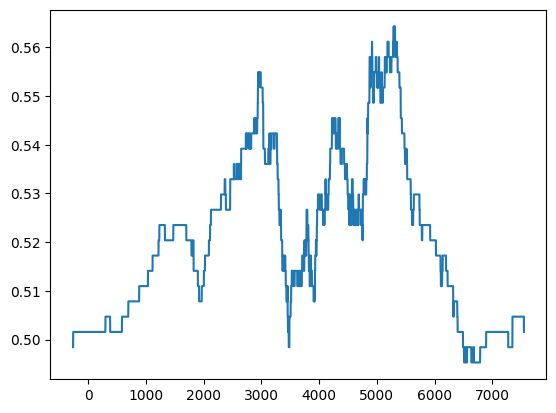

In [14]:
plt.plot(range(round(min(df_allRelations['cos_similarity'])*10000)-1,round(max(df_allRelations['cos_similarity'])*10000)+1), accuracy)

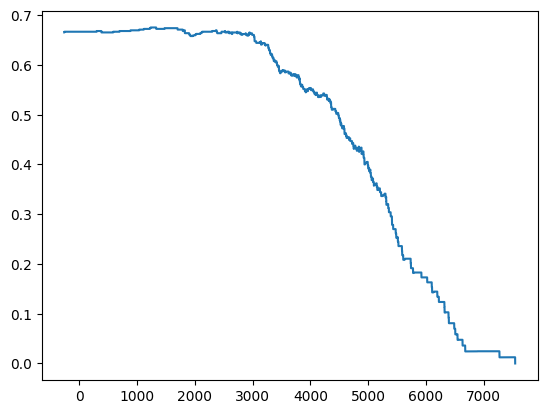

In [15]:
plt.plot(range(round(min(df_allRelations['cos_similarity'])*10000)-1,round(max(df_allRelations['cos_similarity'])*10000)+1), f1)

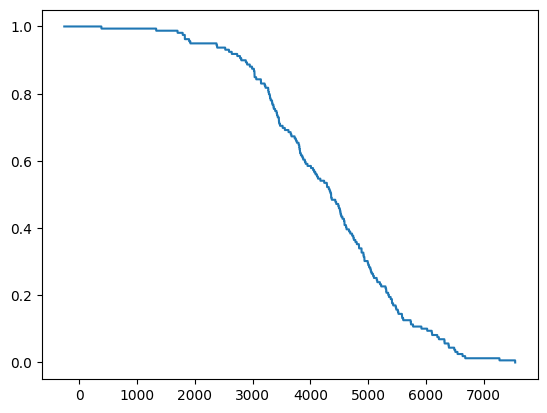

In [16]:
plt.plot(range(round(min(df_allRelations['cos_similarity'])*10000)-1,round(max(df_allRelations['cos_similarity'])*10000)+1), recall)

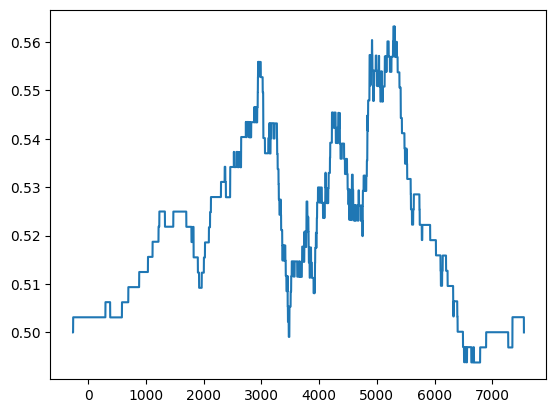

In [17]:
plt.plot(range(round(min(df_allRelations['cos_similarity'])*10000)-1,round(max(df_allRelations['cos_similarity'])*10000)+1), roc_auc)

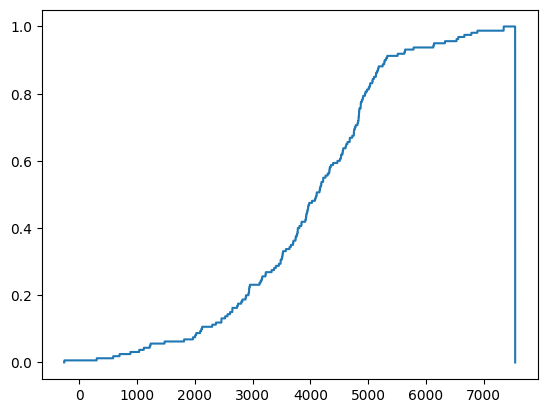

In [18]:
plt.plot(range(round(min(df_allRelations['cos_similarity'])*10000)-1,round(max(df_allRelations['cos_similarity'])*10000)+1), specificity)

In [34]:
indexes = range(round(min(df_allRelations['cos_similarity'])*10000)-1,round(max(df_allRelations['cos_similarity'])*10000)+1)
threshold = roc_auc.index(max(roc_auc[:4000]))
indexes[threshold]/10000

0.2943

In [35]:
roc_auc[threshold]

0.5558962264150943

In [36]:
accuracy[threshold]

0.554858934169279

In [37]:
recall[threshold]

0.8867924528301887

In [38]:
f1[threshold]

0.6650943396226414

In [39]:
specificity[threshold]

0.22499999999999998

# Hem Distance

In [164]:
accuracy = []
precision = []
recall = []
f1 = []
roc_auc = []
specificity=[]
for threshold in range(min(df_allRelations['hem_distance']),max(df_allRelations['hem_distance'])):
    
    df_assumption_hem = df_allRelations.copy()
    df_assumption_hem['y_pred'] =  df_allRelations.apply(lambda row: makeAssumption(row['hem_distance'],threshold),axis=1)

    (accuracy_value, precision_value, recall_value, f1_value, roc_auc_value,specificity_value) = evaluateModel(df_assumption_hem['realtion'], df_assumption_hem['y_pred'])
    accuracy.append(accuracy_value)
    precision.append(precision_value)
    recall.append(recall_value)
    f1.append(f1_value)
    roc_auc.append(roc_auc_value)
    specificity.append(specificity_value)

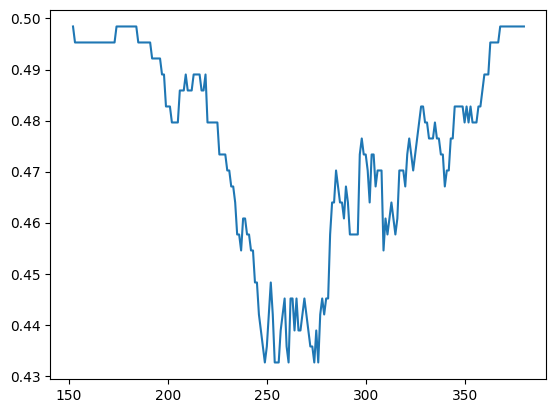

In [165]:
plt.plot(range(min(df_allRelations['hem_distance']),max(df_allRelations['hem_distance'])), accuracy)

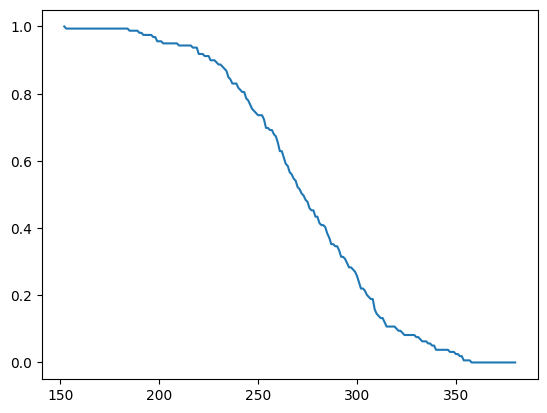

In [166]:
plt.plot(range(min(df_allRelations['hem_distance']),max(df_allRelations['hem_distance'])), recall)

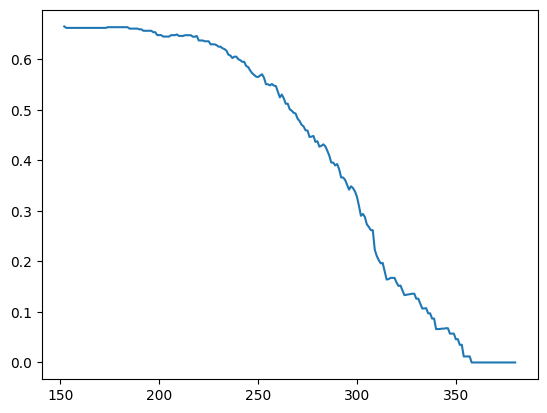

In [167]:
plt.plot(range(min(df_allRelations['hem_distance']),max(df_allRelations['hem_distance'])), f1)

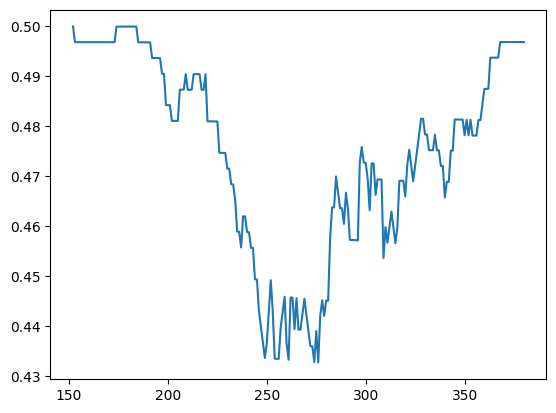

In [168]:
plt.plot(range(min(df_allRelations['hem_distance']),max(df_allRelations['hem_distance'])), roc_auc)

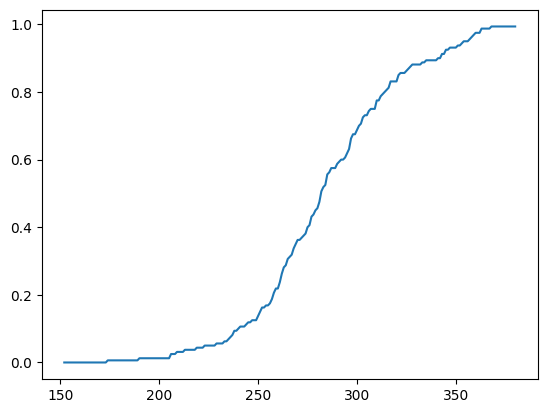

In [169]:
plt.plot(range(min(df_allRelations['hem_distance']),max(df_allRelations['hem_distance'])), specificity)

# Cos Similarity Weighted

In [207]:
accuracy = []
precision = []
recall = []
f1 = []
roc_auc = []
specificity=[]
for threshold in range(round(min(df_allRelations['cos_similarity_weighted'])*100)-1,round(max(df_allRelations['cos_similarity_weighted'])*100)+1):
    threshold = threshold/100
    df_assumption = df_allRelations.copy()
    df_assumption['y_pred'] =  df_allRelations.apply(lambda row: makeAssumption(row['cos_similarity_weighted'],threshold),axis=1)

    (accuracy_value, precision_value, recall_value, f1_value, roc_auc_value,specificity_value) = evaluateModel(df_assumption['realtion'], df_assumption['y_pred'])
    accuracy.append(accuracy_value)
    precision.append(precision_value)
    recall.append(recall_value)
    f1.append(f1_value)
    roc_auc.append(roc_auc_value)
    specificity.append(specificity_value)

C:\Users\olive\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


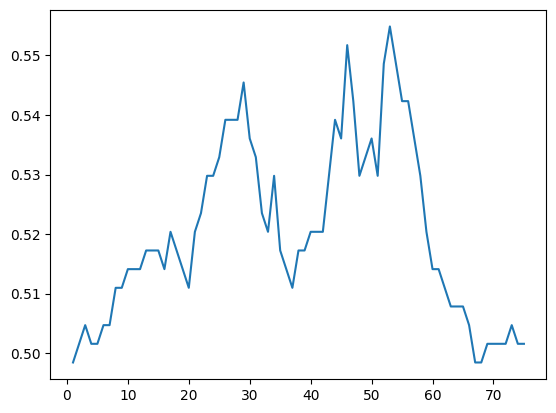

In [210]:
plt.plot(range(round(min(df_allRelations['cos_similarity_weighted'])*100-1),round(max(df_allRelations['cos_similarity_weighted'])*100)+1), accuracy)

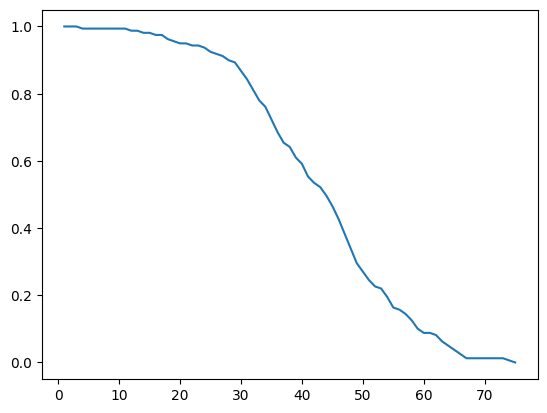

In [211]:
plt.plot(range(round(min(df_allRelations['cos_similarity_weighted'])*100-1),round(max(df_allRelations['cos_similarity_weighted'])*100)+1), recall)

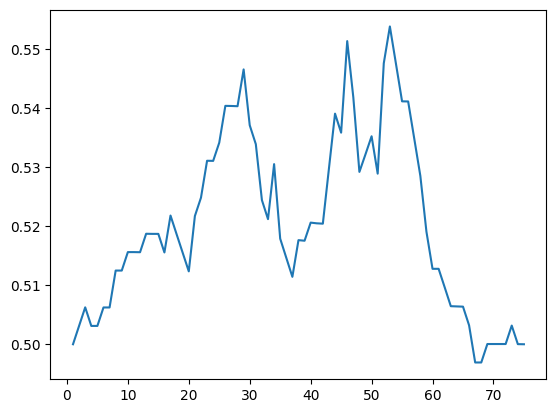

In [212]:
plt.plot(range(round(min(df_allRelations['cos_similarity_weighted'])*100-1),round(max(df_allRelations['cos_similarity_weighted'])*100)+1), roc_auc)

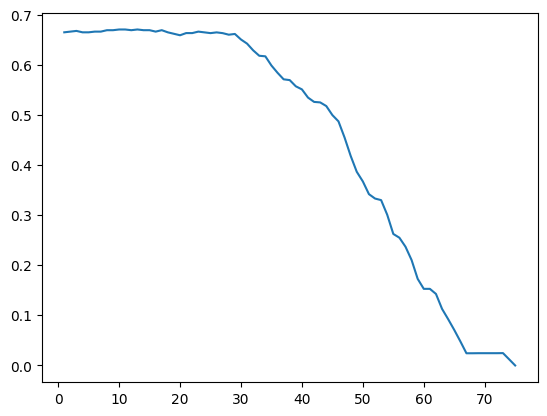

In [213]:
plt.plot(range(round(min(df_allRelations['cos_similarity_weighted'])*100-1),round(max(df_allRelations['cos_similarity_weighted'])*100)+1), f1)

In [223]:
indexes = range(round(min(df_allRelations['cos_similarity_weighted'])*100-1),round(max(df_allRelations['cos_similarity_weighted'])*100)+1)
threshold = roc_auc.index(max(roc_auc[:40]))
indexes[threshold]/100

0.29

In [ ]:
roc_auc[threshold]

In [216]:
recall[threshold]

0.8930817610062893

In [215]:
accuracy[threshold]

0.5454545454545454

In [217]:
f1[threshold]

0.662004662004662

In [218]:
precision[threshold]

0.5259259259259259

In [177]:
df_allRelations.sort_values(by='cos_similarity1', ascending=False).head(10)

,pattern1,pattern2,realtion,cos_similarity1,cos_similarity2,cos_similarity_start,cos_similarity_result
88,EngageCustomers,Surrogate Customer,1,0.877236,0.826463,0.885924,0.847634
136,Completion Headroom,Work Split,1,0.863613,0.695579,0.655709,0.727356
36,Distribute Work Evenly,Three To Seven Helpers Per Role,1,0.833967,0.781948,0.857794,0.767661
0,Few Roles,Divide And Conquer,1,0.831688,0.730982,0.732699,0.865979
69,Subclass Per Team,HierarchyOfFactories,1,0.827305,0.618250,0.700742,0.730367
...,...,...,...,...,...,...,...
24,Shaping Circulation Realms,De-Couple Stages,1,0.591311,0.590691,0.630675,0.616533
148,Programming Episode,Team Per Task,1,0.589499,0.632528,0.605241,0.674211
87,Apprenticeship,Developing In Pairs,1,0.585014,0.687126,0.703048,0.627323
149,Programming Episode,Private World,1,0.566545,0.615027,0.579300,0.631718


In [179]:
df_allRelations.sort_values(by='cos_similarity1', ascending=True).head(10)

,pattern1,pattern2,realtion,cos_similarity1,cos_similarity2,cos_similarity_start,cos_similarity_result
155,Sacrifice One Person,Mercenary Analyst,1,0.519140,0.529309,0.623875,0.587115
149,Programming Episode,Private World,1,0.566545,0.615027,0.579300,0.631718
87,Apprenticeship,Developing In Pairs,1,0.585014,0.687126,0.703048,0.627323
148,Programming Episode,Team Per Task,1,0.589499,0.632528,0.605241,0.674211
24,Shaping Circulation Realms,De-Couple Stages,1,0.591311,0.590691,0.630675,0.616533
131,Take No Small Slips,Recommitment Meeting,1,0.591338,0.728037,0.707552,0.646295
112,Legend Role,Wise Fool,1,0.595020,0.696572,0.635650,0.689052
124,Named Stable Bases,Take No Small Slips,1,0.596099,0.555805,0.686738,0.553889
105,Public Character,Wise Fool,1,0.618752,0.738499,0.694038,0.700282
30,Shaping Circulation Realms,Producers In The Middle,1,0.619290,0.726583,0.780199,0.676084


# Vytváranie sekvencií

In [143]:
#Všetky dvojice vzorov
#unique_1 = df_allRelations['pattern1'].unique()
#unique_2 = df_allRelations['pattern2'].unique()
#patterns = np.union1d(unique_1,unique_2)

patterns_projectManagement = ['Size The Schedule', 'Named Stable Bases', 'Private World', 'Developer Controls Process', 'Work Flows Inward']
patterns_orgStyle = ['Size The Organization', 'Few Roles', 'Producer Roles','Producers In The Middle', 'Stable Roles']
patterns_piecemealGrowth = ['Size The Organization', 'Phasing It In', 'Apprenticeship', 'Solo Virtuoso', 'Self-Selecting Team']
patterns_peopleAndCode = ['Architecture Team', 'LockEmUpTogether', 'Architect Controls Product', 'Unity Of Purpose', 'Architect Also Implements']

## Project Management pattern language

In [131]:
listed_variations = createSequences(patterns_projectManagement)

In [133]:
(sequences, similarities, lengths, distances) = sequenceSimilarity(listed_variations)
df_testing = pd.DataFrame(data = {'sequence':sequences, 'cos_similarity':similarities,'distance':distances,'length':lengths})
df_testing.sort_values(by='cos_similarity', ascending=False).head(20)

,sequence,cos_similarity,distance,length
33,"[Size The Schedule, Named Stable Bases, Privat...",0.589669,0.399897,5
63,"[Named Stable Bases, Private World, Size The S...",0.589625,0.399964,5
54,"[Size The Schedule, Work Flows Inward, Develop...",0.587436,0.399234,5
67,"[Named Stable Bases, Private World, Work Flows...",0.581145,0.397099,5
65,"[Named Stable Bases, Private World, Developer ...",0.578696,0.392438,5
149,"[Work Flows Inward, Developer Controls Process...",0.578015,0.395813,5
32,"[Size The Schedule, Named Stable Bases, Privat...",0.577486,0.392013,5
161,"[Named Stable Bases, Private World, Work Flows...",0.576054,0.385877,4
146,"[Work Flows Inward, Developer Controls Process...",0.575783,0.395153,5
48,"[Size The Schedule, Developer Controls Process...",0.574947,0.391067,5


In [134]:
df_testing.sort_values(by='distance', ascending=False).head(20)

,sequence,cos_similarity,distance,length
63,"[Named Stable Bases, Private World, Size The S...",0.589625,0.399964,5
33,"[Size The Schedule, Named Stable Bases, Privat...",0.589669,0.399897,5
54,"[Size The Schedule, Work Flows Inward, Develop...",0.587436,0.399234,5
67,"[Named Stable Bases, Private World, Work Flows...",0.581145,0.397099,5
149,"[Work Flows Inward, Developer Controls Process...",0.578015,0.395813,5
146,"[Work Flows Inward, Developer Controls Process...",0.575783,0.395153,5
55,"[Size The Schedule, Work Flows Inward, Develop...",0.574672,0.392581,5
65,"[Named Stable Bases, Private World, Developer ...",0.578696,0.392438,5
32,"[Size The Schedule, Named Stable Bases, Privat...",0.577486,0.392013,5
87,"[Private World, Named Stable Bases, Size The S...",0.572788,0.391991,5


In [137]:
(sequences, similarities, lengths, distances)  = sequenceSimilarityWithInterSimilarity(listed_variations)
df_testing = pd.DataFrame(data = {'sequence':sequences, 'cos_similarity':similarities, 'distance':distances,'length':lenghts})
df_testing.sort_values(by='cos_similarity', ascending=False).head(20)

,sequence,cos_similarity,distance,length
67,"[Named Stable Bases, Private World, Work Flows...",0.516067,0.338231,5
149,"[Work Flows Inward, Developer Controls Process...",0.511518,0.336048,5
65,"[Named Stable Bases, Private World, Developer ...",0.508353,0.331424,5
33,"[Size The Schedule, Named Stable Bases, Privat...",0.506543,0.328561,5
63,"[Named Stable Bases, Private World, Size The S...",0.505461,0.328384,5
54,"[Size The Schedule, Work Flows Inward, Develop...",0.503000,0.329063,5
32,"[Size The Schedule, Named Stable Bases, Privat...",0.501492,0.326401,5
50,"[Size The Schedule, Work Flows Inward, Named S...",0.499533,0.325862,5
128,"[Work Flows Inward, Size The Schedule, Named S...",0.499533,0.325760,5
125,"[Developer Controls Process, Work Flows Inward...",0.498673,0.327975,5


In [138]:
df_testing.sort_values(by='distance', ascending=False).head(20)

,sequence,cos_similarity,distance,length
67,"[Named Stable Bases, Private World, Work Flows...",0.516067,0.338231,5
149,"[Work Flows Inward, Developer Controls Process...",0.511518,0.336048,5
65,"[Named Stable Bases, Private World, Developer ...",0.508353,0.331424,5
91,"[Private World, Named Stable Bases, Work Flows...",0.497525,0.329350,5
54,"[Size The Schedule, Work Flows Inward, Develop...",0.503000,0.329063,5
151,"[Work Flows Inward, Developer Controls Process...",0.495643,0.328677,5
33,"[Size The Schedule, Named Stable Bases, Privat...",0.506543,0.328561,5
63,"[Named Stable Bases, Private World, Size The S...",0.505461,0.328384,5
125,"[Developer Controls Process, Work Flows Inward...",0.498673,0.327975,5
55,"[Size The Schedule, Work Flows Inward, Develop...",0.496562,0.326483,5


In [113]:
df_testing.iloc[[33]]['sequence'].values

array([list(['Size The Schedule', 'Named Stable Bases', 'Private World', 'Work Flows Inward', 'Developer Controls Process'])],
      dtype=object)

## Organization Style pattern language

In [121]:
listed_variations = createSequences(patterns_piecemealGrowth)

In [129]:
(sequences, similarities, lengths, distances) = sequenceSimilarity(listed_variations)
df_testing = pd.DataFrame(data = {'sequence':sequences, 'cos_similarity':similarities,'length':lengths})
df_testing.sort_values(by='cos_similarity', ascending=False).head(30)

,sequence,cos_similarity,length
146,"[Self-Selecting Team, Solo Virtuoso, Size The ...",0.590003,5
122,"[Solo Virtuoso, Self-Selecting Team, Size The ...",0.580685,5
105,"[Solo Virtuoso, Size The Organization, Phasing...",0.579403,5
108,"[Solo Virtuoso, Size The Organization, Self-Se...",0.579077,5
128,"[Self-Selecting Team, Size The Organization, P...",0.577602,5
48,"[Size The Organization, Solo Virtuoso, Self-Se...",0.575392,5
104,"[Solo Virtuoso, Size The Organization, Phasing...",0.574207,5
135,"[Self-Selecting Team, Phasing It In, Size The ...",0.572956,5
132,"[Self-Selecting Team, Size The Organization, S...",0.572032,5
136,"[Self-Selecting Team, Phasing It In, Apprentic...",0.571445,5


In [124]:
df_testing.iloc[[33]]['sequence'].values

array([list(['Size The Organization', 'Phasing It In', 'Apprenticeship', 'Self-Selecting Team', 'Solo Virtuoso'])],
      dtype=object)

In [127]:
(sequences, similarities, lengths, distances)  = sequenceSimilarityWithInterSimilarity(listed_variations)
df_testing = pd.DataFrame(data = {'sequence':sequences, 'cos_similarity':similarities, 'length':lenghts})
df_testing.sort_values(by='cos_similarity', ascending=False).head(30)

,sequence,cos_similarity,length
128,"[Self-Selecting Team, Size The Organization, P...",0.519037,5
146,"[Self-Selecting Team, Solo Virtuoso, Size The ...",0.517413,5
135,"[Self-Selecting Team, Phasing It In, Size The ...",0.512505,5
104,"[Solo Virtuoso, Size The Organization, Phasing...",0.511791,5
105,"[Solo Virtuoso, Size The Organization, Phasing...",0.510668,5
75,"[Phasing It In, Self-Selecting Team, Size The ...",0.507550,5
122,"[Solo Virtuoso, Self-Selecting Team, Size The ...",0.506492,5
37,"[Size The Organization, Phasing It In, Self-Se...",0.506358,5
129,"[Self-Selecting Team, Size The Organization, P...",0.506049,5
33,"[Size The Organization, Phasing It In, Apprent...",0.505293,5


## Piecemeal Growth pattern language

In [161]:
listed_variations = createSequences(patterns_orgStyle)

(sequences, similarities, lengths, distances) = sequenceSimilarity(listed_variations)
df_testing = pd.DataFrame(data = {'sequence':sequences, 'cos_similarity':similarities,'length':lengths})
df_testing.sort_values(by='cos_similarity', ascending=False).head(40)


,sequence,cos_similarity,length
145,"[Stable Roles, Producer Roles, Producers In Th...",0.616994,5
149,"[Stable Roles, Producers In The Middle, Few Ro...",0.614525,5
137,"[Stable Roles, Few Roles, Producer Roles, Prod...",0.613358,5
151,"[Stable Roles, Producers In The Middle, Produc...",0.605640,5
128,"[Stable Roles, Size The Organization, Few Role...",0.604413,5
67,"[Few Roles, Producer Roles, Stable Roles, Prod...",0.604402,5
50,"[Size The Organization, Stable Roles, Few Role...",0.601465,5
64,"[Few Roles, Producer Roles, Producers In The M...",0.601256,5
77,"[Few Roles, Stable Roles, Producer Roles, Prod...",0.600551,5
65,"[Few Roles, Producer Roles, Producers In The M...",0.600314,5


In [158]:
(sequences, similarities, lengths, distances)  = sequenceSimilarityWithInterSimilarity(listed_variations)
df_testing = pd.DataFrame(data = {'sequence':sequences, 'cos_similarity':similarities, 'length':lenghts})
df_testing.sort_values(by='cos_similarity', ascending=False).head(20)

,sequence,cos_similarity,length
0,"[Architecture Team, LockEmUpTogether]",0.000000,2
185,"[Unity Of Purpose, Architect Controls Product]",0.000000,2
184,"[Architect Controls Product, Unity Of Purpose]",0.000000,2
153,"[Architect Controls Product, LockEmUpTogether]",0.000000,2
152,"[LockEmUpTogether, Architect Controls Product]",0.000000,2
192,"[Unity Of Purpose, Architect Also Implements]",0.000000,2
193,"[Architect Also Implements, Unity Of Purpose]",0.000000,2
1,"[LockEmUpTogether, Architecture Team]",0.000000,2
191,"[Architect Also Implements, Unity Of Purpose, ...",0.234939,3
186,"[Architect Controls Product, Unity Of Purpose,...",0.240121,3


## Peoploe And Code pattern language

In [181]:
listed_variations = createSequences(patterns_peopleAndCode)

(sequences, similarities, lengths, distances) = sequenceSimilarity(listed_variations)
df_testing = pd.DataFrame(data = {'sequence':sequences, 'cos_similarity':similarities,'length':lengths})
df_testing.sort_values(by='cos_similarity', ascending=False).head(40)


,sequence,cos_similarity,length
110,"[Unity Of Purpose, LockEmUpTogether, Architect...",0.644667,5
118,"[Unity Of Purpose, Architect Controls Product,...",0.644617,5
57,"[LockEmUpTogether, Architecture Team, Architec...",0.638821,5
142,"[Architect Also Implements, Architect Controls...",0.636467,5
124,"[Unity Of Purpose, Architect Also Implements, ...",0.636102,5
87,"[Architect Controls Product, LockEmUpTogether,...",0.635683,5
111,"[Unity Of Purpose, LockEmUpTogether, Architect...",0.635572,5
104,"[Unity Of Purpose, Architecture Team, LockEmUp...",0.635541,5
86,"[Architect Controls Product, LockEmUpTogether,...",0.635030,5
58,"[LockEmUpTogether, Architecture Team, Unity Of...",0.634761,5


In [188]:
(sequences, similarities, lengths, distances)  = sequenceSimilarityWithInterSimilarity(listed_variations)
df_testing = pd.DataFrame(data = {'sequence':sequences, 'cos_similarity':similarities, 'length':lenghts})
df_testing.sort_values(by='cos_similarity', ascending=False).head(30)

,sequence,cos_similarity,length
57,"[LockEmUpTogether, Architecture Team, Architec...",0.579928,5
110,"[Unity Of Purpose, LockEmUpTogether, Architect...",0.576691,5
118,"[Unity Of Purpose, Architect Controls Product,...",0.574737,5
86,"[Architect Controls Product, LockEmUpTogether,...",0.573100,5
56,"[LockEmUpTogether, Architecture Team, Architec...",0.573039,5
87,"[Architect Controls Product, LockEmUpTogether,...",0.572990,5
60,"[LockEmUpTogether, Architecture Team, Architec...",0.572644,5
38,"[Architecture Team, Architect Controls Product...",0.571460,5
111,"[Unity Of Purpose, LockEmUpTogether, Architect...",0.571432,5
80,"[Architect Controls Product, Architecture Team...",0.571175,5


In [186]:
df_testing.iloc[[154]]['sequence'].values

array([list(['LockEmUpTogether', 'Architect Controls Product', 'Unity Of Purpose'])],
      dtype=object)

In [174]:
len(listed_variations)

199

Cs(A,B) = 0.6
Cs(B,C) = 0.4
Cs(A,C) = 0.55

Cs(B,D) = 0.4
Cs(A,D) = 0.35


1.

A->B->C
(Cs(A,B)+Cs(B,C)) /2  = (0.6+0.4) / 2 = 0.5
A->B->D
(Cs(A,B)+Cs(B,D)) /2  = (0.6+0.4) / 2 = 0.5

2.
A->B->C
(Cs(A,B) + Cs(B,C)*(1+Cs(A,C)) ) / 2 == 0.6+ (0.4*(1,55)) / 2+ == (0.6 + 0.62) / 2 = 0.61
A->B->D
(Cs(A,B) + Cs(B,C)*(1+Cs(A,D)) ) / 2 == 0.6+ (0.4*(1,35)) / 2+ == (0.6 + 0.54) / 2 = 0.57